### Import library 

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data  Load

In [3]:

family = pd.read_excel('Combinedata_all.xlsx')

In [4]:
family.head()

,geoid,County,Edu,Income,Poverty,Enroll,Both_Parents,Single_Mother,Single_Father,Orphanchild,Avg_Family_size,PoorChild,Disablity,N_of_Owners
0,14000US48085030100,Collin County,849,63208,726,1748,612,81,41,404,3.50,122,8.5690,1649
1,14000US48085030201,Collin County,605,77847,253,912,330,39,46,136,3.19,58,0.0000,2607
2,14000US48085030202,Collin County,398,75506,316,436,354,16,0,158,3.23,53,0.0000,1505
3,14000US48085030203,Collin County,4052,87360,873,4982,2646,407,152,958,3.65,358,1.3200,752
4,14000US48085030301,Collin County,1780,100444,456,2106,1007,56,61,258,3.39,34,6.1803,692


In [5]:
family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 0 to 1171
Data columns (total 14 columns):
geoid              1172 non-null object
County             1172 non-null object
Edu                1172 non-null int64
Income             1172 non-null int64
Poverty            1172 non-null int64
Enroll             1172 non-null int64
Both_Parents       1172 non-null int64
Single_Mother      1172 non-null int64
Single_Father      1172 non-null int64
Orphanchild        1172 non-null int64
Avg_Family_size    1172 non-null float64
PoorChild          1172 non-null int64
Disablity          1172 non-null float64
N_of_Owners        1172 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 137.3+ KB


In [6]:
df = family.drop(['geoid','County'], axis = 1)

### Data Preprocessing 

#### Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
family_scaled = pd.concat([family[['geoid','County']],scaled_df], axis=1, sort=False)

In [9]:
family_scaled.head()

,geoid,County,Edu,Income,Poverty,Enroll,Both_Parents,Single_Mother,Single_Father,Orphanchild,Avg_Family_size,PoorChild,Disablity,N_of_Owners
0,14000US48085030100,Collin County,-0.234267,-0.193491,0.017628,0.276220,0.386642,-0.589855,-0.115320,0.868732,0.194392,0.203504,-0.139411,0.006345
1,14000US48085030201,Collin County,-0.525638,0.189894,-0.749177,-0.574300,-0.310755,-0.942439,-0.008292,-0.465435,-0.448896,-0.340294,-0.448047,0.709165
2,14000US48085030202,Collin County,-0.772825,0.128585,-0.647044,-1.058567,-0.251402,-1.135522,-0.992947,-0.355914,-0.365891,-0.382779,-0.448047,-0.099298
3,14000US48085030203,Collin County,3.590570,0.439032,0.255937,3.566388,5.416804,2.146875,2.260697,3.626675,0.505661,2.208760,-0.400504,-0.651722
4,14000US48085030301,Collin County,0.877479,0.781693,-0.420083,0.640438,1.363493,-0.799727,0.312791,0.141909,-0.033871,-0.544219,-0.225447,-0.695740


In [10]:
family_only = family_scaled[['geoid', 'County','Orphanchild','Avg_Family_size', 'PoorChild', 'Disablity', 'N_of_Owners','Both_Parents','Single_Mother','Single_Father']]

#### Collinearity Check

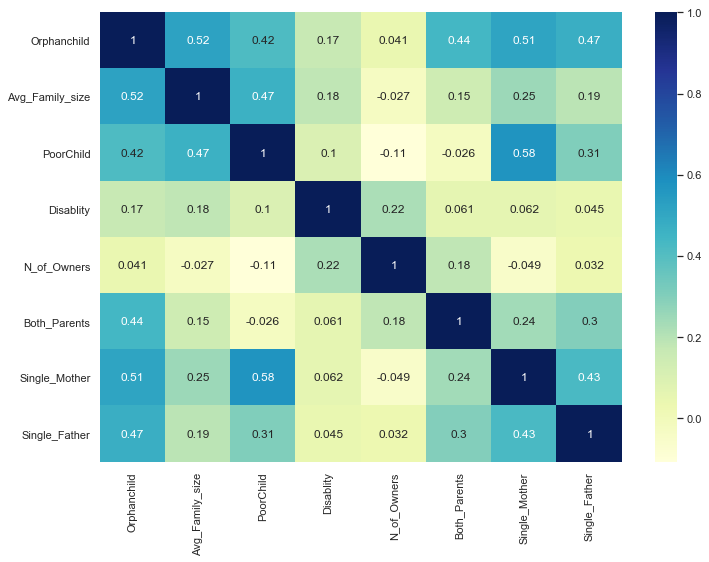

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(
    family_only.corr(),cmap = "YlGnBu",
    annot=True
)

### Methodology

####  The pearson correlation method

In [12]:
##  Constructing The Family Type Domain
X = family_scaled[['Both_Parents','Single_Mother','Single_Father']]

In [13]:
## X vs Poverty
df_type = pd.concat([X, family_scaled['Poverty']], axis=1, sort=False)
dfcor = df_type.corr().reset_index()
s1 = dfcor.iloc[3,1:4].abs()

In [14]:
s1/s1.sum()

Both_Parents     0.0337658
Single_Mother     0.614193
Single_Father     0.352041
Name: 3, dtype: object

In [15]:
## X vs Edu
df_type2 = pd.concat([X, family_scaled['Enroll']], axis=1, sort=False)
dfcor2 = df_type2.corr().reset_index()
s2 = dfcor2.iloc[3,1:4].abs()

In [16]:
s2/s2.sum()

Both_Parents     0.469575
Single_Mother    0.280009
Single_Father    0.250417
Name: 3, dtype: object

In [17]:
## X vs Income
df_type3 = pd.concat([X, family_scaled['Income']], axis = 1)
dfcor3 = df_type3.corr().reset_index()
s3 = dfcor3.iloc[3,1:4].abs()

In [18]:
s3/s3.sum()

Both_Parents     0.405018
Single_Mother    0.397123
Single_Father    0.197859
Name: 3, dtype: object

In [19]:
ss = (s1+s2+s3)/3

In [20]:
s = ss/ss.sum()

In [21]:
## Domain for family_type, more opportuniy, resverse 
family_scaled['TypeScore'] = 0.34*family_scaled['Both_Parents'] - 0.40*family_scaled['Single_Mother'] - 0.26*family_scaled['Single_Father']

In [22]:
family_scaled.drop(['Both_Parents','Single_Mother','Single_Father'], axis = 1, inplace = True)

In [23]:
family_scaled.head()

,geoid,County,Edu,Income,Poverty,Enroll,Orphanchild,Avg_Family_size,PoorChild,Disablity,N_of_Owners,TypeScore
0,14000US48085030100,Collin County,-0.234267,-0.193491,0.017628,0.276220,0.868732,0.194392,0.203504,-0.139411,0.006345,0.397383
1,14000US48085030201,Collin County,-0.525638,0.189894,-0.749177,-0.574300,-0.465435,-0.448896,-0.340294,-0.448047,0.709165,0.273475
2,14000US48085030202,Collin County,-0.772825,0.128585,-0.647044,-1.058567,-0.355914,-0.365891,-0.382779,-0.448047,-0.099298,0.626898
3,14000US48085030203,Collin County,3.590570,0.439032,0.255937,3.566388,3.626675,0.505661,2.208760,-0.400504,-0.651722,0.395182
4,14000US48085030301,Collin County,0.877479,0.781693,-0.420083,0.640438,0.141909,-0.033871,-0.544219,-0.225447,-0.695740,0.702152


#### Final Score - Regression coefficients

In [26]:
from statsmodels.api import OLS

In [27]:
x_f = family_scaled[['Orphanchild','Avg_Family_size', 'PoorChild', 'Disablity', 'N_of_Owners','TypeScore']]

In [28]:
lreg_f1 = OLS(family_scaled['Income'], x_f)
lreg_f1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Income   R-squared (uncentered):                   0.446
Model:                            OLS   Adj. R-squared (uncentered):              0.443
Method:                 Least Squares   F-statistic:                              156.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                   1.05e-145
Time:                        11:33:44   Log-Likelihood:                         -1317.0
No. Observations:                1172   AIC:                                      2646.
Df Residuals:                    1166   BIC:                                      2676.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Orphanchild         0.1318      0.027      4.912      0.000       0.079       0.184
Avg_Family_size    -0.2134      0.028     -7.745      0.000      -0.267      -0.159
PoorChild          -0.1686      0.030     -5.638      0.000      -0.227      -0.110
Disablity          -0.0159      0.023     -0.696      0.487      -0.061       0.029
N_of_Owners         0.0763      0.023      3.358      0.001       0.032       0.121
TypeScore           0.8984      0.048     18.526      0.000       0.803       0.994
==============================================================================
Omnibus:                      382.463   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1510.139
Skew:                           1.524   Prob(JB):                         0.00
Kurtosis:                       7.651   Cond. No.                         3.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
l = [0.15+0.21+0.18+0.01+0.08+0.84]

In [37]:
np.array(l).sum()

1.47

In [38]:
0.15/1.47 #orphan
-0.21/1.47 #avg
-0.17/1.47 #PoorChild
-0.01/1.47 #Dis
0.08/1.47  #N
0.84/1.47  #TS

0.10204081632653061

-0.14285714285714285

-0.11564625850340136

-0.006802721088435375

0.054421768707483

0.5714285714285714

In [39]:
family_scaled['final'] = 0.10*family_scaled['Orphanchild'] - 0.14*family_scaled['Avg_Family_size'] - 0.12*family_scaled['PoorChild'] - 0.01*family_scaled['Disablity'] + 0.05*family_scaled['N_of_Owners'] + 0.57*family_scaled['TypeScore']

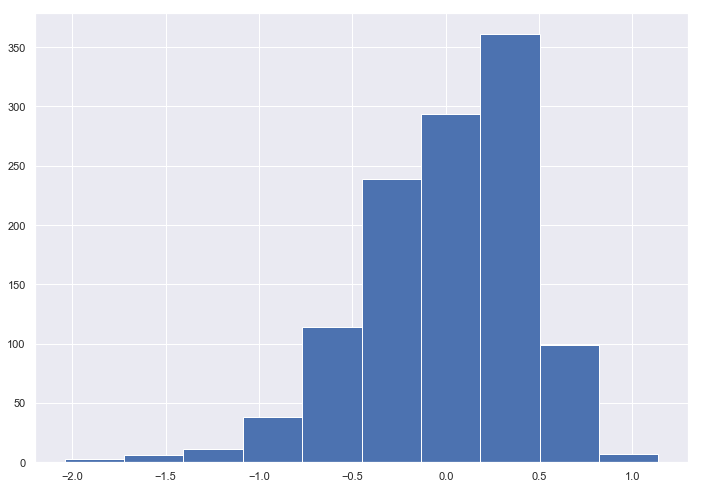

In [40]:
family_scaled['final'].hist()

#### Scale Final Score 

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
f = np.array(family_scaled['final']).reshape(-1,1)
final_score = scaler.fit_transform(f)

In [47]:
family_scaled['final'] = final_score*100

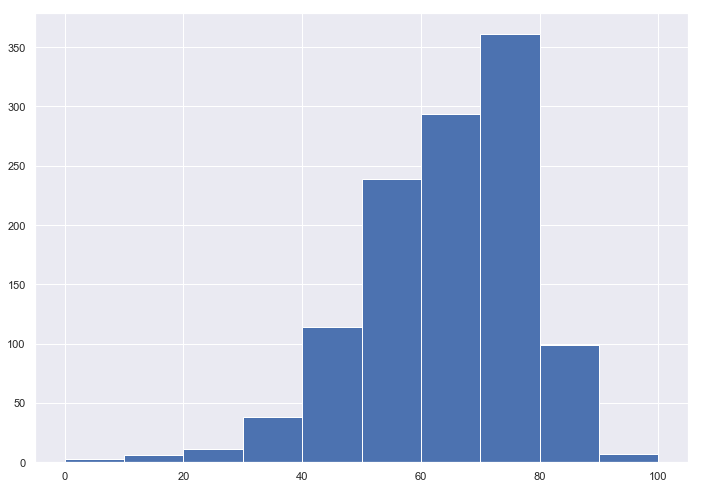

In [48]:
family_scaled['final'].hist()